# 📌 Extracão

In [108]:
import pandas as pd

#Buscando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [110]:
# Extrai e normaliza os dados aninhados da coluna em colunas planas
df_customer = pd.json_normalize(df['customer'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])
df_phone = pd.json_normalize(df['phone'])

# Cria um DataFrame apenas com o ID do cliente e o status de churn
df_main = df[['customerID', 'Churn']]

# Junta todos os dados em um único DataFrame final
df_final = pd.concat([df_main, df_customer, df_phone, df_internet, df_account], axis=1)

In [111]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [113]:
print('INFORMAÇÕES DA BASE DE DADOS')
print(f'Nº Linhas: {df_final.shape[0]}')
print(f'Nº Colunas: {df_final.shape[1]}')

INFORMAÇÕES DA BASE DE DADOS
Nº Linhas: 7267
Nº Colunas: 21


In [114]:
df_final.to_csv('TelecomX_Dados.csv', index=False)

# 🔧 Transformação

In [115]:
df_base = pd.read_csv('TelecomX_Dados.csv')

In [116]:
# Normalizando nomes das colunas
df_base.columns = df_base.columns.str.lower()

# Traduzindo nomes das colunas
# A tradução é feita para facilitar a compreensão, mas pode ser ajustada conforme necessário
traducao_colunas = {
    'customerid': 'id_cliente',
    'gender': 'genero',
    'seniorcitizen': 'idoso',
    'partner': 'tem_conjuge',
    'dependents': 'dependentes',
    'tenure': 'tempo_de_contrato',
    'phoneservice': 'servico_telefone',
    'multiplelines': 'multiplas_linhas',
    'internetservice': 'servico_internet',
    'onlinesecurity': 'seguranca_online',
    'onlinebackup': 'backup_online',
    'deviceprotection': 'protecao_aparelho',
    'techsupport': 'suporte_tecnico',
    'streamingtv': 'tv_streaming',
    'streamingmovies': 'filmes_streaming',
    'contract': 'contrato',
    'paperlessbilling': 'fatura_digital',
    'paymentmethod': 'metodo_pagamento',
    'charges.monthly': 'cobranca_mensal',
    'charges.total': 'cobranca_total'
}
df_base.rename(columns=traducao_colunas, inplace=True)

traducao_contratos = {
    'One year': 'anual',
    'Month-to-month': 'mensal',
    'Two year': 'bianual'
}
df_base['contrato'] = df_base['contrato'].replace(traducao_contratos)

traducao_pagamentos = {
    'Mailed check': 'Cheque enviado pelo correio',
    'Electronic check': 'Cheque eletronico',
    'Credit card (automatic)': 'Cartao de crédito (automatico)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automatica)'
}
df_base['metodo_pagamento'] = df_base['metodo_pagamento'].replace(traducao_pagamentos)

traducao_internet = {
    'DSL': 'DSL',
    'Fiber optic': 'Fibra optica',
    'No': 'Sem servico de internet'
}
df_base['servico_internet'] = df_base['servico_internet'].replace(traducao_internet)

traducao_genero = {
    'Female': 'Feminino',
    'Male': 'Masculino'
}
df_base['genero'] = df_base['genero'].replace(traducao_genero)

In [117]:
# Removendo linhas duplicadas
linhas_duplicadas = df_base[df_base.duplicated()]
percentual_linhas_duplicadas = (len(linhas_duplicadas) / df_base.shape[0]) * 100
print(f"Número de linhas duplicadas: {len(linhas_duplicadas)} - {percentual_linhas_duplicadas:.2f}%")
df_base = df_base.drop_duplicates()

# Conversão de tipo
df_base['cobranca_total'] = pd.to_numeric(df_base['cobranca_total'], errors='coerce')

# Verificando valor nulos
linhas_com_nulo = df_base[df_base.isnull().any(axis=1)]
percentual_linhas_nulas = (len(linhas_com_nulo) / df_base.shape[0]) * 100
print(f"Número de linhas com algum valor nulo: {len(linhas_com_nulo)} - {percentual_linhas_nulas:.2f}%")

df_base = df_base.dropna()

# Normalizando colunas de binárias
colunas_yes_no = ['churn','tem_conjuge','dependentes','servico_telefone','fatura_digital']
df_base[colunas_yes_no] = df_base[colunas_yes_no].apply(lambda x: x.str.lower())
df_base[colunas_yes_no] = df_base[colunas_yes_no].replace({'yes': 1, 'no': 0})
df_base[colunas_yes_no] = df_base[colunas_yes_no].apply(lambda x: x.astype(int))

Número de linhas duplicadas: 0 - 0.00%
Número de linhas com algum valor nulo: 235 - 3.23%


In [118]:
# Criando coluna de cobrança diária
# Considerando 30 dias para o cálculo
df_base['cobranca_diaria'] = df_base['cobranca_mensal'] / 30

In [119]:
print(f'TOTAL DE LINHAS: {df_base.shape[0]}')
print(f'TOTAL DE COLUNAS: {df_base.shape[1]}')

TOTAL DE LINHAS: 7032
TOTAL DE COLUNAS: 22


In [120]:
# Removendo coluna id_cliente para análise
df_base.drop(columns=['id_cliente'], inplace=True)

# Salvando a base de dados limpa
df_base.to_csv('TelecomX_Dados_Limpos.csv', index=False)

# 📊 Carga e análise

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Carregando a base de dados limpa
df_base = pd.read_csv('TelecomX_Dados_Limpos.csv')

In [123]:
def plot_pizza_churn(df_base, coluna, cores, titulo_pizza, titulo_barras, titulo_legenda):
    """
    Gera dois gráficos lado a lado para análise de churn com base em uma coluna categórica.

    Parâmetros:
    - df_base (DataFrame): Conjunto de dados com a coluna alvo e a variável 'churn'.
    - coluna (str): Nome da coluna categórica para análise (ex: gênero, segmento).
    - cores (list): Lista de cores correspondentes às categorias da coluna.
    - titulo_pizza (str): Título do gráfico de pizza.
    - titulo_barras (str): Título do gráfico de barras.
    - titulo_legenda (str): Título da legenda do gráfico de barras.

    Observações:
    - A coluna 'churn' deve conter 0 (Não churn) e 1 (Churn).
    """

    # Definindo ordem desejada e cores associadas
    tipos = df_base[coluna].unique()

    # Dados para gráfico de pizza (distribuição de gênero)
    counts = df_base[coluna].value_counts().sort_values()
    counts = counts.reindex(tipos)

    # Dados para gráfico de barras (churn por gênero em %)
    churn = (
        df_base
        .groupby(['churn', coluna])
        .size()
        .groupby(level=0)
        .apply(lambda x: 100 * x / x.sum())
        .unstack(coluna) 
    )

    churn.index = churn.index.droplevel(0)
    churn.index = churn.index.map({0: 'Não churn', 1: 'Churn'})
    churn.columns.name = None
    churn = churn[tipos]

    # Criação do gráfico
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    churn.plot(kind='bar', stacked=False, ax=axs[1], color=cores)

    # Gráfico de pizza
    axs[0].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=cores, startangle=90)
    axs[0].set_title(titulo_pizza, fontsize=14)
    axs[0].axis('equal')

    # Título e eixos
    axs[1].set_title(titulo_barras, fontsize=14)
    axs[1].set_ylabel('Percentual (%)')
    axs[1].set_xlabel('')

    # Ajuste visual
    axs[1].get_yaxis().set_visible(False)
    axs[1].grid(False)
    for spine in ['top', 'right', 'left']:
        axs[1].spines[spine].set_visible(False)
    axs[1].tick_params(axis='x', rotation=0)

    # Adicionar valor nas barras
    for container in axs[1].containers:
        axs[1].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

    # Legenda
    handles, labels = axs[1].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    axs[1].legend(
        by_label.values(),
        by_label.keys(),
        title=titulo_legenda,
        bbox_to_anchor=(0.98, 0.98)
    )

    plt.tight_layout()
    plt.show()

def plot_barra_churn(df_base, coluna, cores, titulo_barra1, titulo_barra2, titulo_legenda):
    """
    Gera dois gráficos lado a lado para análise da distribuição de uma variável categórica
    e sua relação com o churn (cancelamento).

    O primeiro gráfico mostra a distribuição percentual de categorias da coluna especificada.
    O segundo gráfico mostra a proporção de churn e não churn para essas categorias.

    Parâmetros:
    - df_base (DataFrame): Conjunto de dados contendo a variável de churn e a coluna categórica.
    - coluna (str): Nome da coluna categórica a ser analisada (ex: gênero, segmento).
    - cores (list): Lista de cores para representar cada categoria da coluna.
    - titulo_barra1 (str): Título do primeiro gráfico de barras (distribuição).
    - titulo_barra2 (str): Título do segundo gráfico de barras (churn por categoria).
    - titulo_legenda (str): Título da legenda do segundo gráfico.

    Observações:
    - A coluna 'churn' deve conter 0 (Não churn) e 1 (Churn).
    """

    # Obtém os valores únicos da coluna escolhida para garantir a ordem desejada nos gráficos
    tipos = df_base[coluna].unique()

    # Calcula a distribuição percentual (normalizada) das categorias da coluna
    counts = df_base[coluna].value_counts(normalize=True).sort_values()
    counts = counts.reindex(tipos)                       # Reorganiza as categorias na ordem original
    counts = counts.to_frame().T                         # Transforma em linha para plotar em barras
    counts.values[0] = counts.values[0]*100              # Converte para porcentagem
    counts = counts.sort_values(by=counts.index[0], axis=1, ascending=False)  # Ordena da maior para menor
    counts = counts.rename(index={'proportion': titulo_legenda})  # Renomeia índice para usar como legenda

    # Calcula a taxa de churn por categoria (em %)
    churn = (
        df_base
        .groupby(['churn', coluna])
        .size()
        .groupby(level=0)
        .apply(lambda x: 100 * x / x.sum())              # Normaliza por linha (churn e não churn)
        .unstack(coluna)                                 # Transforma categorias em colunas
    )

    # Ajusta os índices para ficarem mais legíveis nos gráficos
    churn.index = churn.index.droplevel(0)
    churn.index = churn.index.map({0: 'Não churn', 1: 'Churn'})
    churn.columns.name = None
    churn = churn[tipos]                                 # Reordena colunas conforme `tipos`

    # Cria dois gráficos lado a lado
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Gráfico da distribuição geral das categorias
    counts.plot(kind='bar', stacked=False, ax=axs[0], color=cores)
    axs[0].set_title(titulo_barra1, fontsize=14)
    axs[0].set_ylabel('Percentual (%)')
    axs[0].set_xlabel('')
    axs[0].get_yaxis().set_visible(False)
    axs[0].grid(False)
    axs[0].tick_params(axis='x', rotation=0)

    # Remove bordas visuais desnecessárias
    for spine in ['top', 'right', 'left']:
        axs[0].spines[spine].set_visible(False)

    # Adiciona rótulos com percentuais nas barras
    for container in axs[0].containers:
        axs[0].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

    # Remove legenda do primeiro gráfico se presente
    if axs[0].get_legend():
        axs[0].get_legend().remove()

    # Gráfico da taxa de churn por categoria
    churn.plot(kind='bar', stacked=False, ax=axs[1], color=cores)
    axs[1].set_title(titulo_barra2, fontsize=14)
    axs[1].set_ylabel('Percentual (%)')
    axs[1].set_xlabel('')
    axs[1].get_yaxis().set_visible(False)
    axs[1].grid(False)
    axs[1].tick_params(axis='x', rotation=0)

    # Remove bordas do segundo gráfico também
    for spine in ['top', 'right', 'left']:
        axs[1].spines[spine].set_visible(False)

    # Adiciona percentuais nas barras do churn
    for container in axs[1].containers:
        axs[1].bar_label(container, fmt='%.0f%%', label_type='edge', fontsize=9)

    # Ajusta legenda com título e posição
    handles, labels = axs[1].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[1].legend(
        by_label.values(),
        by_label.keys(),
        title=titulo_legenda,
        bbox_to_anchor=(0.98, 0.98)
    )

    # Ajusta espaçamento entre os gráficos e exibe
    plt.tight_layout()
    plt.show()

def plot_boxplot(df_base, x, y, titulo, label, cores):
    """
    Gera um boxplot comparando a distribuição de uma variável numérica entre clientes com e sem churn.

    Parâmetros:
    - df_base (DataFrame): Conjunto de dados contendo a coluna 'churn', além das colunas especificadas.
    - x (str): Nome da coluna categórica usada no eixo X (geralmente mesmo valor para todos).
    - y (str): Nome da variável numérica a ser analisada.
    - titulo (str): Título do gráfico.
    - label (str): Nome do eixo Y (label da variável numérica).
    - cores (list): Lista de cores para representar os grupos (ex: ['#00C49A', '#FF4444'] para Não Churn e Churn).

    Funcionamento:
    - Cria um boxplot dividido por churn para mostrar a distribuição da variável numérica.
    - Calcula as médias e medianas e insere marcadores de média visualmente.
    - Customiza os elementos visuais, como grid, títulos, legendas e eixos.

    Observações:
    - A coluna 'churn' deve conter os valores 0 e 1.
    """
    # Define o tamanho da figura do gráfico
    plt.figure(figsize=(8, 5))

    # Cria o boxplot com separação por churn (hue)
    sns.boxplot(
        x=x,                  # variável categórica no eixo X
        y=y,                  # variável numérica a ser visualizada
        hue='churn',          # separa por churn: 0 (Não churn) ou 1 (Churn)
        data=df_base,
        palette=cores,        
        linewidth=1.5,        
        fliersize=4,          
        boxprops=dict(alpha=0.8),  
        legend=False          # desativa a legenda automática
    )

    # Calcula a média e mediana da variável para churn e não churn
    medias = df_base.groupby('churn')[y].mean()
    medianas = df_base.groupby('churn')[y].median()

    # Plota a média como marcador extra por cima do boxplot
    for i in range(2):  # churn: 0 ou 1
        plt.scatter(
            i, medias[i], 
            color='black', marker='D', s=40, 
            zorder=5, label='Média' if i == 0 else ""
        )

    # Define título e rótulo dos eixos
    plt.title(titulo, fontsize=14, weight='bold')
    plt.xlabel('')
    plt.ylabel(label, fontsize=12)

    # Ajusta os rótulos do eixo X manualmente
    plt.xticks([0, 1], ['Não Churn', 'Churn'], fontsize=11)

    # Remove bordas e adiciona grade suave
    sns.despine()
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Adiciona legenda no canto superior direito
    plt.legend(loc='upper right')

    # Ajusta o layout e exibe o gráfico
    plt.tight_layout()
    plt.show()

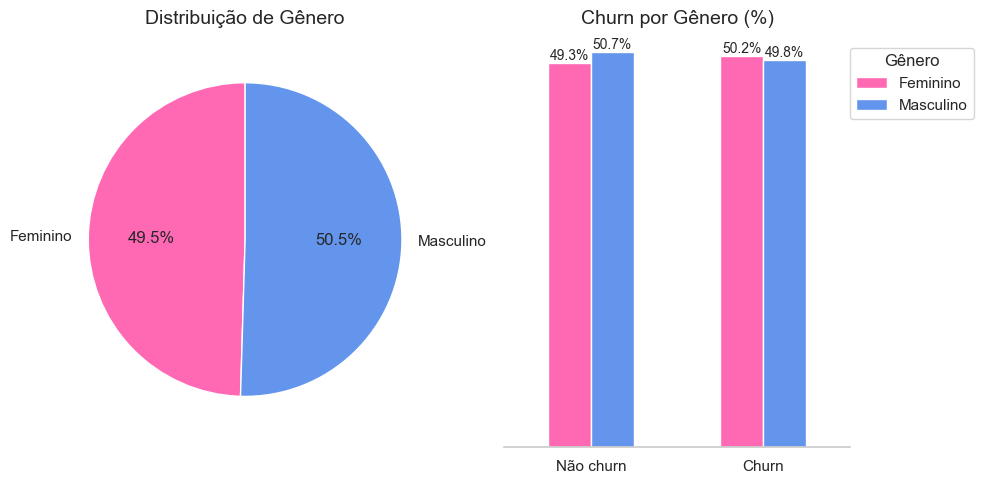

In [124]:
cores = ['#FF69B4', '#6495ED']

titulo_barras = 'Churn por Gênero (%)'
titulo_pizza = 'Distribuição de Gênero'
titulo_legenda = 'Gênero'
coluna = 'genero'

plot_pizza_churn(df_base, coluna, cores, titulo_pizza, titulo_barras, titulo_legenda)

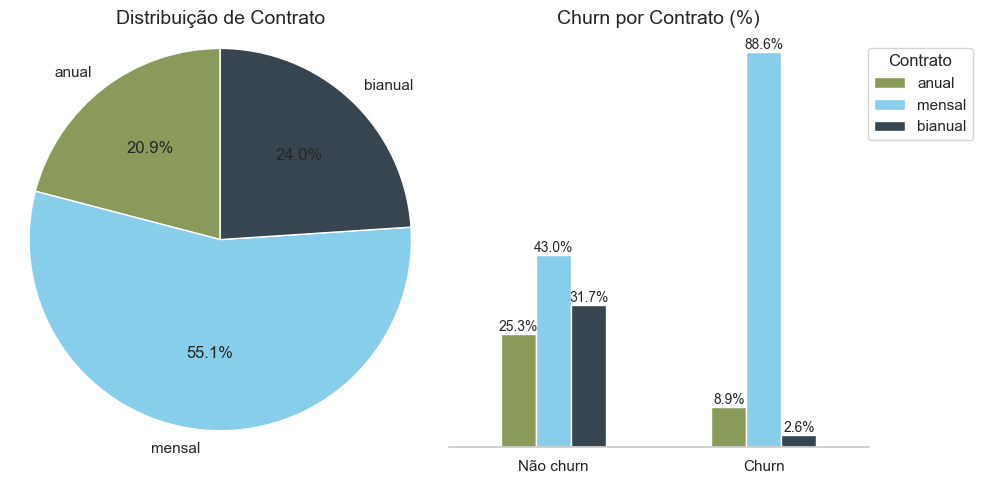

In [125]:
cores = ['#8A9A5B', '#87CEEB','#36454F' ]

titulo_barras = 'Churn por Contrato (%)'
titulo_pizza = 'Distribuição de Contrato'
titulo_legenda = 'Contrato'
coluna = 'contrato'

plot_pizza_churn(df_base, coluna, cores, titulo_pizza, titulo_barras, titulo_legenda)

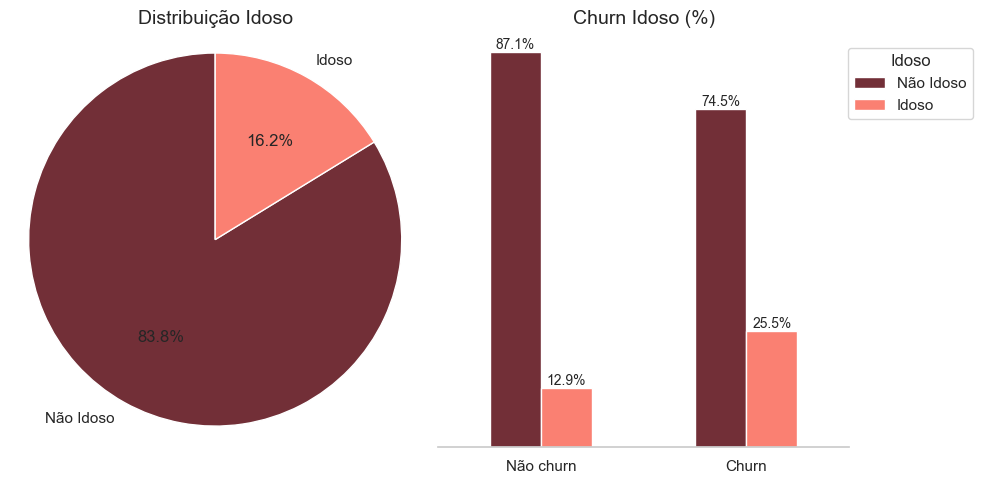

In [126]:
cores = ['#722F37', '#FA8072']

titulo_barras = 'Churn Idoso (%)'
titulo_pizza = 'Distribuição Idoso'
titulo_legenda = 'Idoso'
coluna = 'idoso'

df = df_base.copy()
df[coluna].replace({0: 'Não Idoso', 1: 'Idoso'}, inplace=True)

plot_pizza_churn(df, coluna, cores, titulo_pizza, titulo_barras, titulo_legenda)


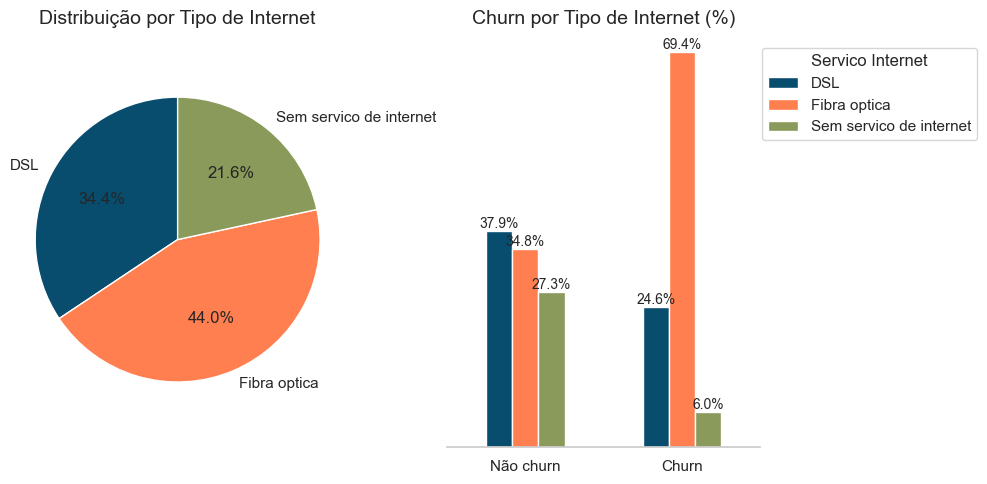

In [127]:
cores = ['#084D6E', '#FF7F50', '#8A9A5B']  

titulo_barras = 'Churn por Tipo de Internet (%)'
titulo_pizza = 'Distribuição por Tipo de Internet'
titulo_legenda = 'Servico Internet'
coluna = 'servico_internet'

plot_pizza_churn(df_base, coluna, cores, titulo_pizza, titulo_barras, titulo_legenda)

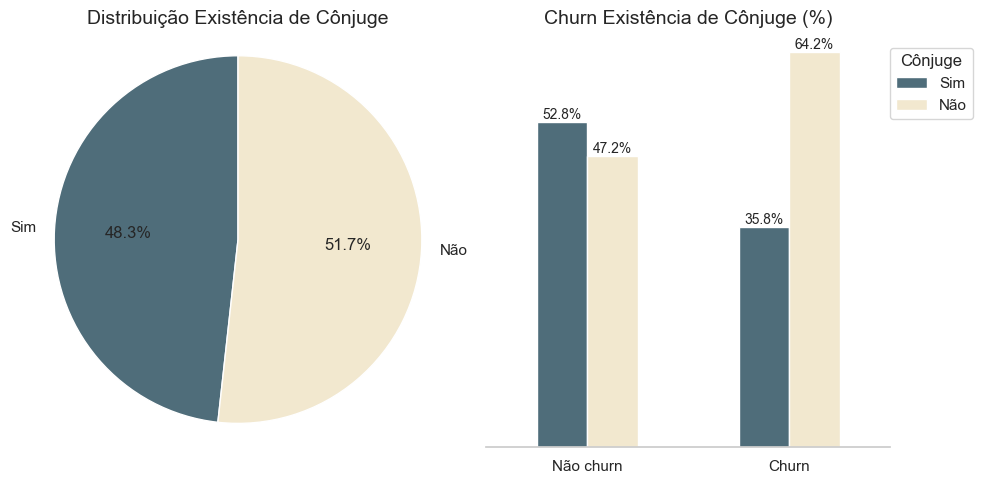

In [128]:
cores = ['#4F6D7A', '#F2E8CF']  

titulo_barras = 'Churn Existência de Cônjuge (%)'
titulo_pizza = 'Distribuição Existência de Cônjuge'
titulo_legenda = 'Cônjuge'
coluna = 'tem_conjuge'

df = df_base.copy()
df[coluna].replace({0: 'Não', 1: 'Sim'}, inplace=True)

plot_pizza_churn(df, coluna, cores, titulo_pizza, titulo_barras, titulo_legenda)

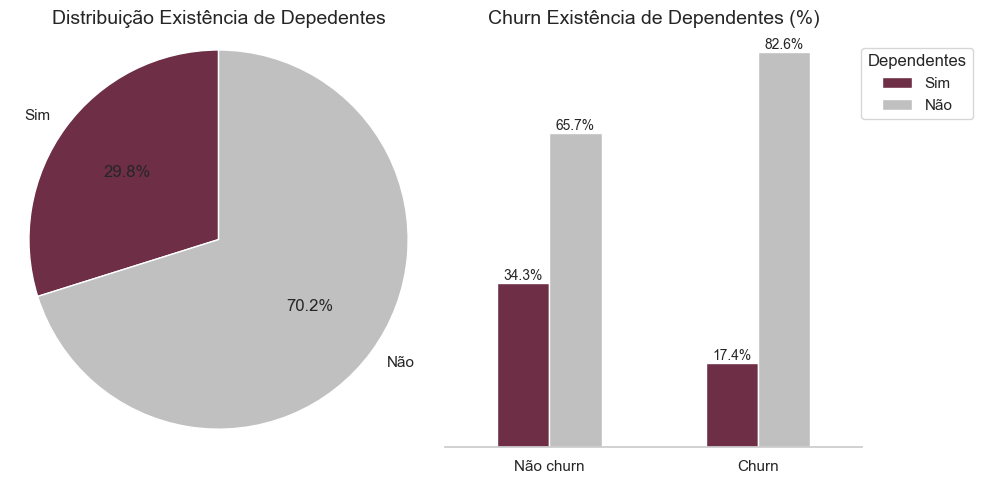

In [129]:
cores = [ '#6D2E46', '#C0C0C0' ]

titulo_barras = 'Churn Existência de Dependentes (%)'
titulo_pizza = 'Distribuição Existência de Depedentes'
titulo_legenda = 'Dependentes'
coluna = 'dependentes'

df = df_base.copy()
df[coluna].replace({0: 'Não', 1: 'Sim'}, inplace=True)

plot_pizza_churn(df, coluna, cores, titulo_pizza, titulo_barras, titulo_legenda)

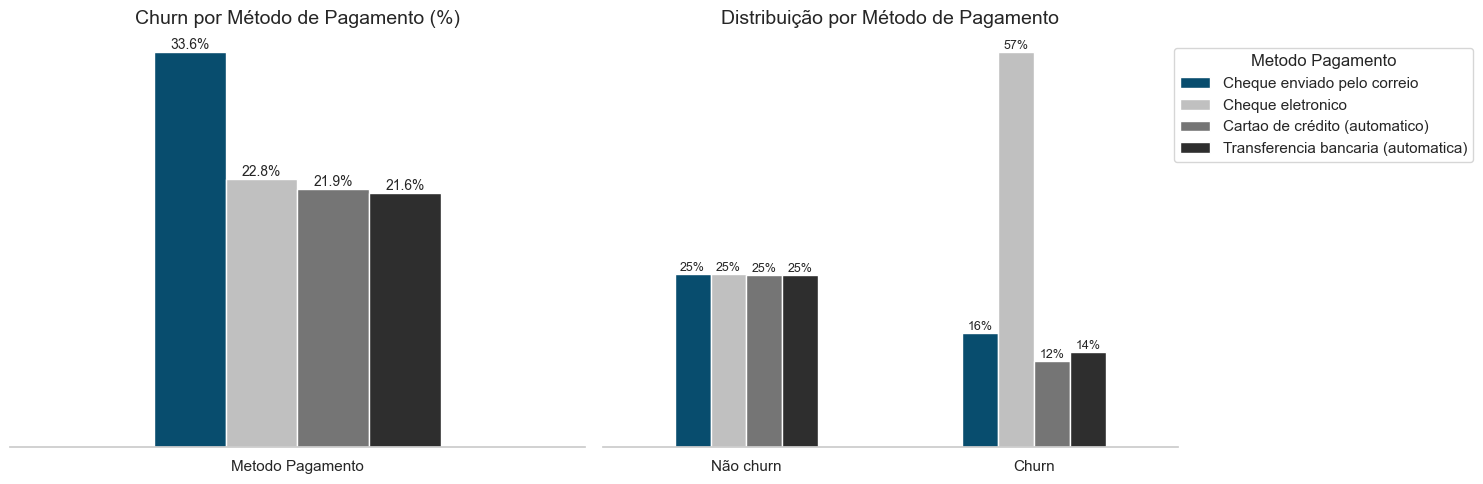

In [130]:
cores = [ '#084D6E', '#C0C0C0', '#757575','#2E2E2E' ]

titulo_churn = 'Churn por Método de Pagamento (%)'
titulo_barra = 'Distribuição por Método de Pagamento'
titulo_legenda = 'Metodo Pagamento'
coluna = 'metodo_pagamento'

plot_barra_churn(df_base, coluna, cores, titulo_churn, titulo_barra, titulo_legenda)

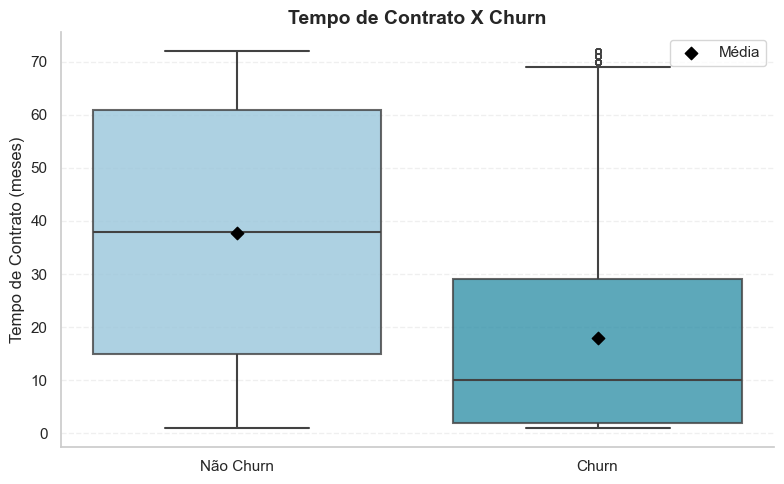

In [131]:
cores = ['#8ECAE6', '#219EBC']

x = 'churn'
y = 'tempo_de_contrato'
titulo = 'Tempo de Contrato X Churn'
label = 'Tempo de Contrato (meses)'

plot_boxplot(df_base, x, y, titulo, label, cores)

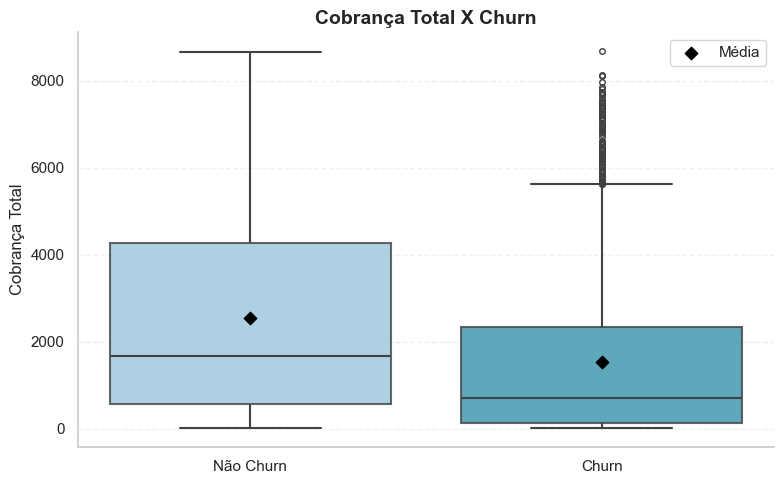

In [132]:
cores = ['#8ECAE6', '#219EBC']

x = 'churn'
y = 'cobranca_total'
titulo = 'Cobrança Total X Churn'
label = 'Cobrança Total'

plot_boxplot(df_base, x, y, titulo, label, cores)

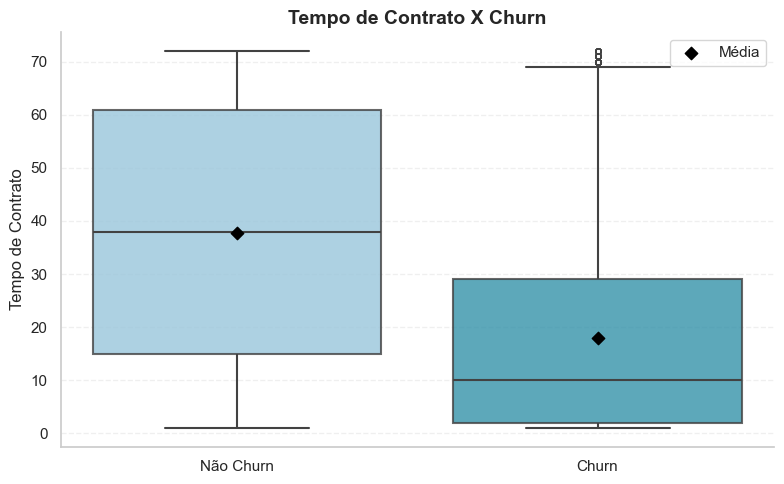

In [133]:
cores = ['#8ECAE6', '#219EBC']

x = 'churn'
y = 'tempo_de_contrato'
titulo = 'Tempo de Contrato X Churn'
label = 'Tempo de Contrato'

plot_boxplot(df_base, x, y, titulo, label, cores)

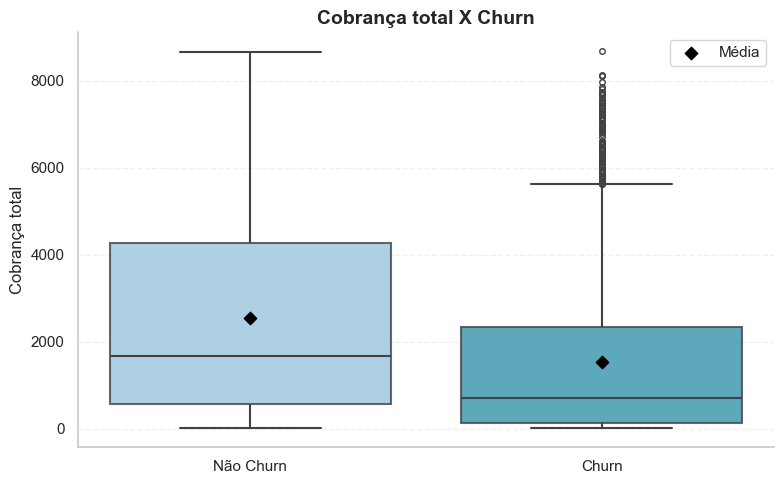

In [134]:
cores = ['#8ECAE6', '#219EBC']

x = 'churn'
y = 'cobranca_total'
titulo = 'Cobrança total X Churn'
label = 'Cobrança total'

plot_boxplot(df_base, x, y, titulo, label, cores)

# 📄Relatorio Final

A evasão de clientes — conhecida como churn — representa um dos maiores obstáculos para empresas de telecomunicações, impactando diretamente a sustentabilidade do negócio. Este estudo tem como foco a análise dos padrões de cancelamento de clientes da TelecomX a partir de dados reais. Ao compreender as variáveis que influenciam o churn, a empresa poderá desenvolver estratégias mais eficazes de retenção, melhorar a experiência do usuário e minimizar perdas financeiras.

## Limpeza e Tratamento de Dados

**Padronização de Colunas**
- Todas as colunas foram convertidas para letras minúsculas.
- Os nomes técnicos foram traduzidos para português, com o objetivo de facilitar a interpretação e análise dos dados.

**Tratamento de Valores Categóricos**
- Tradução dos valores nas colunas:
  - `contrato`: 'Month-to-month', 'One year', 'Two year' → 'mensal', 'anual', 'bianual'.
  - `metodo_pagamento`: tradução de métodos como 'Electronic check', 'Mailed check', etc.
  - `servico_internet`: tradução de 'DSL', 'Fiber optic', 'No'.
  - `genero`: 'Male', 'Female' → 'Masculino', 'Feminino'.

**Remoção de Dados Duplicados e Nulos**
- Identificação e remoção de linhas duplicadas.
- Conversão da coluna `cobranca_total` para tipo numérico com tratamento de erros.
- Detecção de valores nulos e exclusão de registros incompletos.

**Normalização de Variáveis Binárias**
- Colunas como `churn`, `tem_conjuge`, `dependentes`, `servico_telefone` e `fatura_digital` foram convertidas:
  - Texto em minúsculo: 'yes' / 'no' → 'yes' / 'no'.
  - Transformação em variáveis binárias numéricas: 1 para “sim”, 0 para “não”.

## Análise 

Durante a análise exploratória, foram utilizados gráficos de pizza, barras e boxplots para investigar os principais fatores relacionados ao churn (evasão) dos clientes da TelecomX. As visualizações permitiram identificar padrões relevantes:

- ***Gênero:*** A distribuição entre masculino e feminino é equilibrada, e o churn não apresenta diferença significativa entre os gêneros.  
- ***Contrato:*** Clientes com contrato mensal apresentam taxas de churn muito superiores aos contratos anual e bianual, indicando maior risco de evasão nesse grupo.  
- **Idosos:** A proporção de churn é maior entre clientes idosos, sugerindo que esse público pode demandar atenção especial.
- **Tipo de Internet:** Clientes sem serviço de internet têm menor churn, enquanto usuários de fibra óptica apresentam taxas mais elevadas.  
- **Cônjuge e Dependentes:** Clientes sem cônjuge ou dependentes tendem a apresentar maior churn.  
- **Método de Pagamento:** Métodos como cheque eletrônico estão associados a maior churn, enquanto transferência bancária automática apresenta menor evasão.  
- **Tempo de Contrato e Cobrança Total:** Boxplots mostram que clientes com menor tempo de contrato e menor cobrança total têm maior propensão ao churn.

## Conclusões e Insights

- `Cobrança mensal` são o principal fator de risco para churn. Estratégias de retenção devem focar nesse grupo.
- Clientes `idosos` e sem vínculos familiares (`cônjuge` e/ou `dependentes`) estão mais propensos a cancelar.
- `Métodos de pagamento` automáticos (transferência bancária) reduzem a evasão.
- Menor `tempo de contrato` e baixa cobrança total indicam clientes menos engajados, com maior chance de churn.
- `Tipo de serviço de internet` influencia a evasão, especialmente para fibra óptica.

## Recomendações

- Oferecer benefícios para contratos de longo prazo: Incentive a migração de clientes mensais para planos anual/bianual com descontos ou vantagens.
- Criar campanhas de retenção para idosos: Desenvolver atendimento personalizado e benefícios para esse público.
- Facilitar métodos de pagamento automáticos: Promover a adesão à transferência bancária automática, reduzindo o churn.
- Aumentar o engajamento de novos clientes: Oferecer onboarding, suporte e benefícios nos primeiros meses para aumentar o tempo de contrato.
- Personalizar ofertas para clientes sem vínculos familiares: Identificar e oferecer vantagens específicas para clientes sem cônjuge ou dependentes.
- Monitorar clientes de fibra óptica: Investigar causas de insatisfação e promover melhorias nesse serviço.

# Correlação entre as variáveis

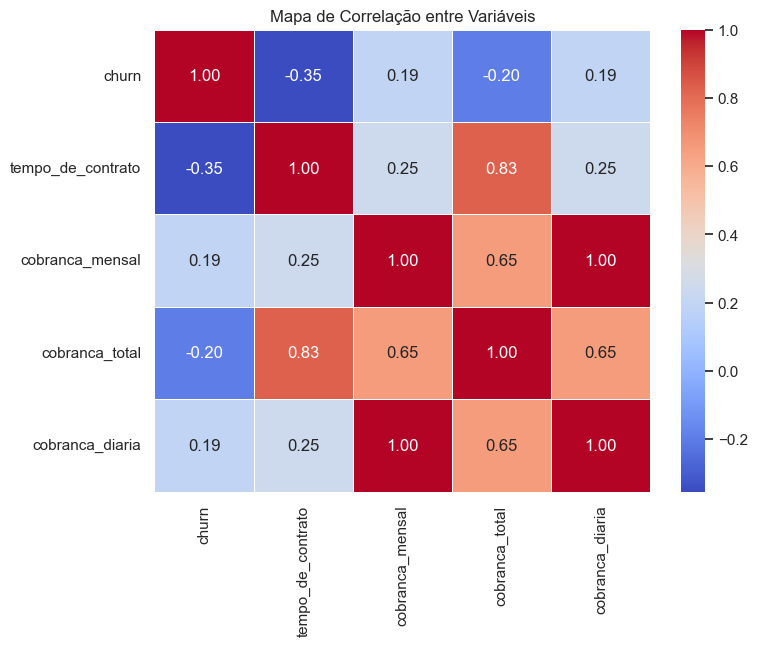

In [135]:
binarias = ['genero','idoso', 'tem_conjuge', 'dependentes', 'servico_telefone', 'fatura_digital']
categoricas = df_base.select_dtypes(include=['object']).columns.tolist()

numericas_todas = df_base.select_dtypes(include=['int64', 'float64']).columns.tolist()
numericas = [col for col in numericas_todas if col not in binarias]

correlacao = df_base[numericas].corr()

# Criando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlação entre Variáveis')
plt.show()


1. Churn vs. Tempo de contrato → −0.35
- Correlação negativa moderada.
- Clientes com contratos mais longos tendem a cancelar menos.
- Insight: Fidelizar clientes com contratos mais duradouros pode reduzir o churn.

2. Churn vs. Cobrança mensal / diária → +0.19
- Correlação positiva fraca.
- Clientes com cobranças mensais ou diárias mais altas têm levemente maior chance de cancelar.
- Insight: Tarifas elevadas podem contribuir para o churn, especialmente se o valor percebido for baixo.

3. Tempo de contrato vs. Cobrança total → +0.83
- Correlação positiva forte.
- Quanto maior o tempo de contrato, maior o valor total cobrado.
- Insight: Clientes antigos geram mais receita cumulativa — importante para estratégias de retenção.

4. Cobrança mensal vs. Cobrança diária → +1.00
- Correlação perfeita.
- As duas variáveis são provavelmente derivadas uma da outra (ex: diária = mensal / 30).
- Insight: Redundância — pode ser útil manter apenas uma delas na análise.

Resumo 
- Reduzir churn: Incentivar contratos mais longos e revisar planos com cobranças elevadas.
- Maximizar receita: Focar na retenção de clientes com maior tempo de contrato.
- Otimizar variáveis: Eliminar redundâncias como cobranca_diaria se já temos cobranca_mensal.